In [23]:
#NOWAK STRONA 82 !! metoda polega na poszukiwaniu zbioru vektorów własnych (tj. macierz T) macierzy kowariancji Cx
# modelowanych, skolerowanych zmiennych losowych Xi
# dzięki temu możemy wylosować całkowicie nieskolerowane zmienne losowe Yi i przemnożyć Y * T by otrzymać losowy
# zestaw odpowiednio skoleoranych zmiennych Xi które stanowią wartości wsodowe punktów siatki pola losowego
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [38]:
sigmaXi = 3.0 #odchylenie stand. każdej zmiennej Xi
meanXi = 10.0 #średnia zmiennych Xi
i = 15 #liczba zmiennych losowych
Cx = np.zeros((i,i)) #Cx to macierz kowariancji zmiennych losowych Xi
L = 6 #długość belki (długość korelacji)
deltaX = L / (i + 1) #lag distance - odległości horyzontalne między zmiennymi
Lc=60 #długość korelacji
l_realiz = 80 #żądana liczba realizacji
print("odleglosci horyz =",deltaX)
ro = np.eye(i)
print("'pusta' macierz współczynników korelacji =")
print(ro)

odleglosci horyz = 0.375
'pusta' macierz współczynników korelacji =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [39]:
for a in range(i):
    for b in range(i):
        A=np.exp(-(abs(a-b)*deltaX)/Lc)
        ro[a,b]=A
print("macierz współczynników korelacji =")
print(ro)

macierz współczynników korelacji =
[[1.         0.99376949 0.9875778  0.98142469 0.97530991 0.96923323
  0.96319442 0.95719323 0.95122942 0.94530278 0.93941306 0.93356004
  0.92774349 0.92196317 0.91621887]
 [0.99376949 1.         0.99376949 0.9875778  0.98142469 0.97530991
  0.96923323 0.96319442 0.95719323 0.95122942 0.94530278 0.93941306
  0.93356004 0.92774349 0.92196317]
 [0.9875778  0.99376949 1.         0.99376949 0.9875778  0.98142469
  0.97530991 0.96923323 0.96319442 0.95719323 0.95122942 0.94530278
  0.93941306 0.93356004 0.92774349]
 [0.98142469 0.9875778  0.99376949 1.         0.99376949 0.9875778
  0.98142469 0.97530991 0.96923323 0.96319442 0.95719323 0.95122942
  0.94530278 0.93941306 0.93356004]
 [0.97530991 0.98142469 0.9875778  0.99376949 1.         0.99376949
  0.9875778  0.98142469 0.97530991 0.96923323 0.96319442 0.95719323
  0.95122942 0.94530278 0.93941306]
 [0.96923323 0.97530991 0.98142469 0.9875778  0.99376949 1.
  0.99376949 0.9875778  0.98142469 0.97530991 

In [40]:
Cx=ro*sigmaXi*sigmaXi
print(Cx)

[[9.         8.94392542 8.8882002  8.83282219 8.77778921 8.72309911
  8.66874976 8.61473903 8.56106482 8.50772503 8.45471757 8.40204037
  8.34969138 8.29766855 8.24596984]
 [8.94392542 9.         8.94392542 8.8882002  8.83282219 8.77778921
  8.72309911 8.66874976 8.61473903 8.56106482 8.50772503 8.45471757
  8.40204037 8.34969138 8.29766855]
 [8.8882002  8.94392542 9.         8.94392542 8.8882002  8.83282219
  8.77778921 8.72309911 8.66874976 8.61473903 8.56106482 8.50772503
  8.45471757 8.40204037 8.34969138]
 [8.83282219 8.8882002  8.94392542 9.         8.94392542 8.8882002
  8.83282219 8.77778921 8.72309911 8.66874976 8.61473903 8.56106482
  8.50772503 8.45471757 8.40204037]
 [8.77778921 8.83282219 8.8882002  8.94392542 9.         8.94392542
  8.8882002  8.83282219 8.77778921 8.72309911 8.66874976 8.61473903
  8.56106482 8.50772503 8.45471757]
 [8.72309911 8.77778921 8.83282219 8.8882002  8.94392542 9.
  8.94392542 8.8882002  8.83282219 8.77778921 8.72309911 8.66874976
  8.61473903 

In [41]:
eigenvalues, eigenvectors = np.linalg.eig(Cx)
T=-eigenvectors
print("T=",T) #T jest macierzą przestrzymująca ZBIóR wektorów własnych, ortogonalnych !!!
Tt=np.transpose(T)
#print("Transposed T =",Tt)

T= [[ 2.54968393e-01 -3.60755127e-01 -3.57320362e-01  3.47895680e-01
  -3.34334192e-01 -3.17013393e-01 -2.96180734e-01 -2.72084526e-01
  -2.44997280e-01  2.15219902e-01  1.83080862e-01 -1.48933582e-01
  -1.13153003e-01  3.82756662e-02  7.61316930e-02]
 [ 2.56347811e-01 -3.46647150e-01 -2.97194443e-01  2.16655161e-01
  -1.14710720e-01 -1.57914068e-03  1.11608537e-01  2.13758472e-01
   2.94871951e-01 -3.47016068e-01 -3.65097294e-01  3.47358738e-01
   2.95551410e-01 -1.12916388e-01 -2.14762362e-01]
 [ 2.57516930e-01 -3.16823125e-01 -1.85208258e-01  2.33355733e-03
   1.80980704e-01  3.15436225e-01  3.65036918e-01  3.16575552e-01
   1.83132304e-01 -5.52432924e-04  1.82168503e-01 -3.16018886e-01
  -3.65106245e-01  1.82624178e-01  3.16274135e-01]
 [ 2.58474793e-01 -2.72635193e-01 -4.09033329e-02 -2.12882899e-01
   3.56658659e-01  3.16621321e-01  1.13598693e-01 -1.47867418e-01
  -3.33293630e-01  3.47357809e-01  1.82852915e-01  7.56441850e-02
   2.95260994e-01 -2.44353739e-01 -3.63122015e-01]
 

In [42]:
MeanXi = np.full((i, 1), meanXi)
print(MeanXi)
MeanYi=np.matmul(Tt, MeanXi)
print(MeanYi)

[[10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]
 [10.]]
[[ 3.87289293e+01]
 [-8.43769499e-15]
 [-2.55162737e-01]
 [ 6.66133815e-15]
 [-6.28255971e-02]
 [-1.55431223e-14]
 [-2.66852022e-02]
 [-3.99680289e-15]
 [-1.38153306e-02]
 [ 9.32587341e-15]
 [ 7.60352452e-03]
 [-4.66293670e-15]
 [-3.89697746e-03]
 [ 1.20555109e-03]
 [-4.44089210e-15]]


In [43]:
from numpy.linalg import multi_dot
Cy=multi_dot([Tt, Cx, T])
#print(Cy)

In [44]:
sigmaYi=np.sqrt(Cy)
#print(sigmaYi)

In [45]:
Yi=np.zeros((i, 1))
#Yi

In [46]:
Xiall=np.zeros((i, l_realiz))
for vv in range(l_realiz):
    for ww in range(i):
        A=np.random.normal(MeanYi[ww],np.sqrt(Cy[ww,ww]),size=(1))
        Yi[ww,0]=A
    Xi=np.matmul(T, Yi)
    Xiall[0:i,vv:vv+1] = Xi
#print(Xiall)

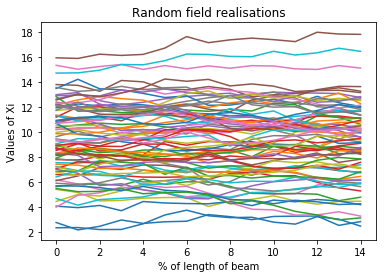

In [47]:
plt.plot(Xiall)
plt.xlabel('% of length of beam')
plt.ylabel('Values of Xi')
plt.title('Random field realisations')
plt.show()